<a href="https://colab.research.google.com/github/Sabindawadi12/Python_Takeo/blob/Projects/AirBNB_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AirBNB data/AB_NYC_2019.csv')

**Exploratory Data Analysis**

Task1:

1) Calculate how many properties in each neighborhood group

2) Which neighborhood group has highest prices, use bar charts to show the prices for all groups

3) Which neighbor hood group as the lowest price use bar charts to show this for all neighborhood groups


In [ ]:
#1. properties in each neighborhood group
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

[21661, 20104, 5666, 1091, 373]


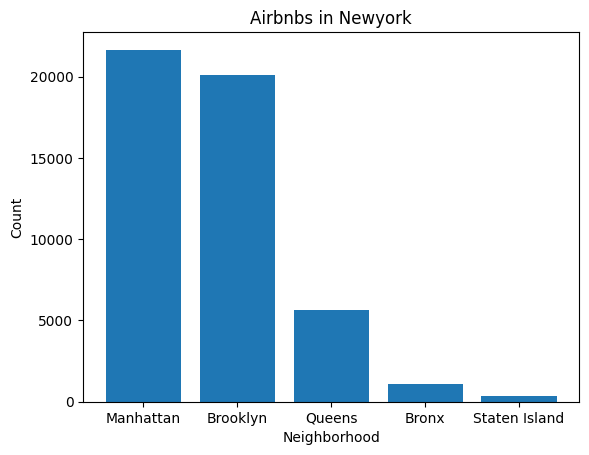

In [ ]:
#question: are corresponding values correct?
#barchart
values = df['neighbourhood_group'].value_counts().tolist()
print(values)
categories = ['Manhattan', 'Brooklyn', 'Queens' , 'Bronx', 'Staten Island']

plt.bar(categories, values)
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Airbnbs in Newyork')
plt.show()


In [ ]:
#Expensive and cheap neighborhoods

#finds most expensive property in the neighbourhood
def max_price(enter_city, df):
  city = str(enter_city)
  maxm_price = df.loc[df['neighbourhood_group']== city, 'price'].max()
  return maxm_price

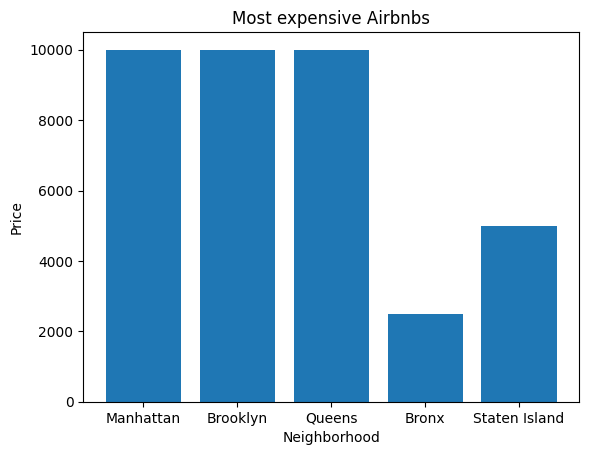

In [ ]:
#Bar chart for expensive properties
categories = ['Manhattan', 'Brooklyn', 'Queens' , 'Bronx', 'Staten Island']
values = [ max_price('Manhattan',df), max_price('Brooklyn',df), max_price('Queens' ,df),
          max_price('Bronx',df), max_price('Staten Island',df)]

plt.bar(categories, values)
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Most expensive Airbnbs')
plt.show()

In [ ]:
#finds cheapest properties
def min_price(enter_city, df):
  city = str(enter_city)
  minm_price = df.loc[df['neighbourhood_group']== city, 'price'].min()
  return minm_price

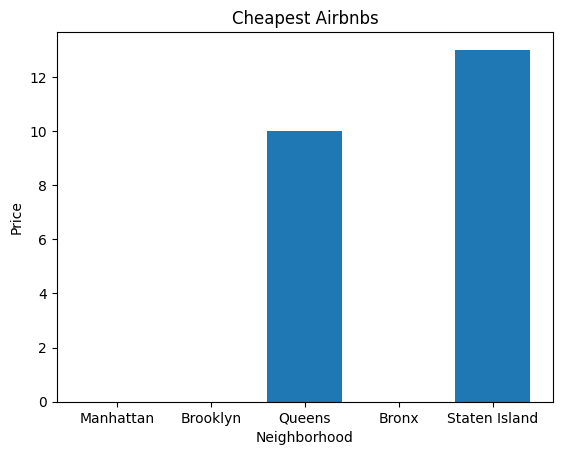

In [ ]:
#Bar chart for cheapest properties
categories = ['Manhattan', 'Brooklyn', 'Queens' , 'Bronx', 'Staten Island']
values = [ min_price('Manhattan',df), min_price('Brooklyn',df), min_price('Queens' ,df),
          min_price('Bronx',df), min_price('Staten Island',df)]

plt.bar(categories, values)
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Cheapest Airbnbs')
plt.show()

#chart indicates 'Zero' values in Manhattan and Brooklyn

In [ ]:
#checking price == 0
free_airbnbs = df.loc[(df['neighbourhood_group'] == 'Brooklyn') & (df['price'] == 0)].shape[0]
print(free_airbnbs)

free_airbnbs2 = df.loc[(df['neighbourhood_group'] == 'Manhattan') & (df['price'] == 0)].shape[0]
print(free_airbnbs2)

#need to drop 10 rows, where price == 0
drop_me1 = df[(df['neighbourhood_group'] == 'Manhattan') & (df['price'] == 0)].index
drop_me2 = df[(df['neighbourhood_group'] == 'Brooklyn') & (df['price'] == 0)].index
drop_me3 = df[(df['neighbourhood_group'] == 'Bronx') & (df['price'] == 0)].index

#drop and override
df = df.drop(drop_me1)
df = df.drop(drop_me2)
df = df.drop(drop_me3)

df.shape

0
0


(48885, 16)

**Exploratory Data Analysis**

Task 2:

4) Which Host has Highest count of properties

5) Which neighbourhood is most expensive and cheapest top 10 barchart

6) Count different type of room_type and do a pie chart showing % of each room type in overall dataset

In [ ]:
df['host_name'].value_counts()
#Michael has the most properties

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11450, dtype: int64

In [ ]:
#most expensive neighborhoods
exp = df.loc[df.groupby('neighbourhood')['price'].idxmax()].sort_values('price', ascending=False)
exp_top10 = new_df.iloc[:10, [5, 9]]
exp_top10

,neighbourhood,price
29238,Upper West Side,10000
17692,Greenpoint,10000
9151,Astoria,10000
12342,Lower East Side,9999
6530,East Harlem,9999
30268,Tribeca,8500
4377,Clinton Hill,8000
29662,Upper East Side,7703
42523,Battery Park City,7500
45666,East Flatbush,7500


['Upper West Side', 'Greenpoint', 'Astoria', 'Lower East Side', 'East Harlem', 'Tribeca', 'Clinton Hill', 'Upper East Side', 'Battery Park City', 'East Flatbush']
[10000, 10000, 10000, 9999, 9999, 8500, 8000, 7703, 7500, 7500]


<function matplotlib.pyplot.show(close=None, block=None)>

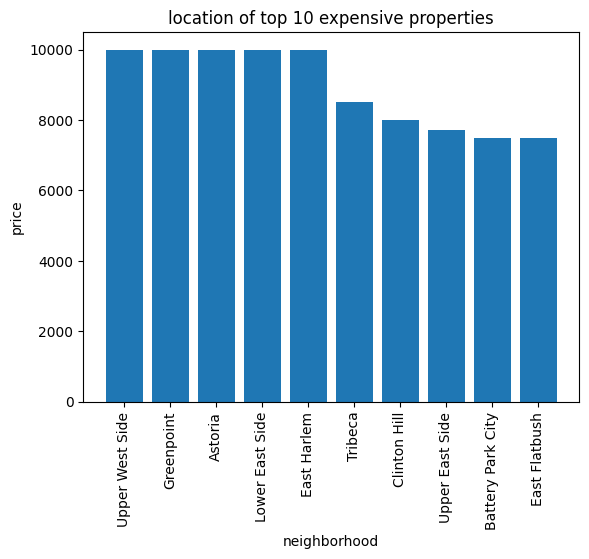

In [ ]:
#bar chart: top 10 expensive

categories = exp_top10['neighbourhood'].tolist()
print(categories)

values = exp_top10['price'].tolist()
print(values)


plt.bar(categories, values)
plt.xlabel('neighborhood')
plt.ylabel('price')
plt.title('top 10 expensive neighborhoods')
plt.xticks(rotation='vertical')
plt.show

In [ ]:
#cheapest propoerties (location)
chp = df.loc[df.groupby('neighbourhood')['price'].idxmin()].sort_values('price', ascending=True)
chp_top10 = chp.iloc[:10,[5,9]]
chp_top10

,neighbourhood,price
25433,East Morrisania,0
22287,SoHo,10
27972,Greenpoint,10
22261,Bushwick,10
32810,Sunset Park,10
21700,Harlem,10
34446,Highbridge,10
2860,East Village,10
23256,Upper East Side,10
31066,Upper West Side,10


<function matplotlib.pyplot.show(close=None, block=None)>

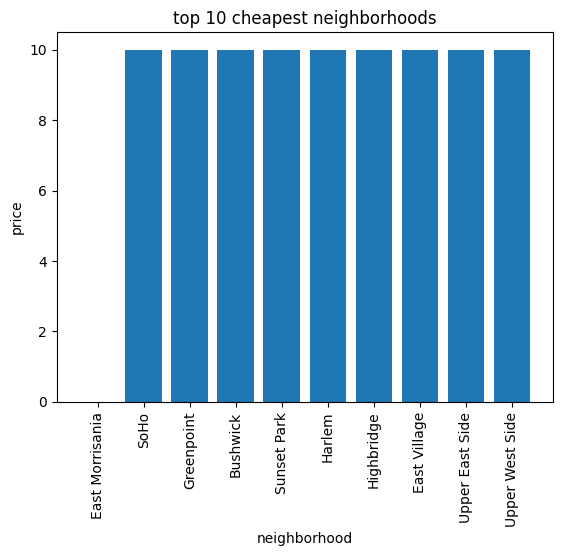

In [ ]:
#top 10 cheapest neighborhoods
categories = chp_top10['neighbourhood'].tolist()
values = chp_top10['price'].tolist()

plt.bar(categories, values)
plt.xlabel('neighborhood')
plt.ylabel('price')
plt.title('top 10 cheapest neighborhoods')
plt.xticks(rotation='vertical')
plt.show

**Exploratory Data Analysis**

Task 3:

7) Count different type of room_type and do a pie chart showing % of each room type in overall dataset

8) scatter plot between longitutude and latitude for different neighbourhood groups

9) scatter plot between longitutude and latitude for different room_types

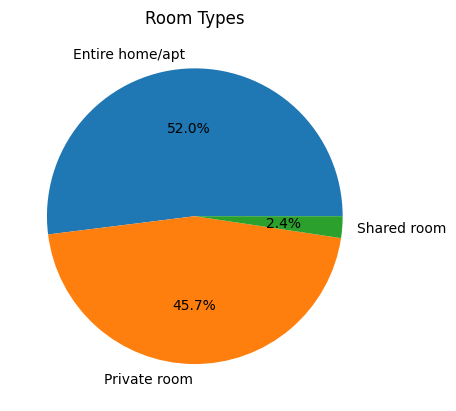

In [ ]:
#pie chart of room types
room_type_counts = df['room_type'].value_counts()
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%')
plt.title('Room Types')
plt.show()

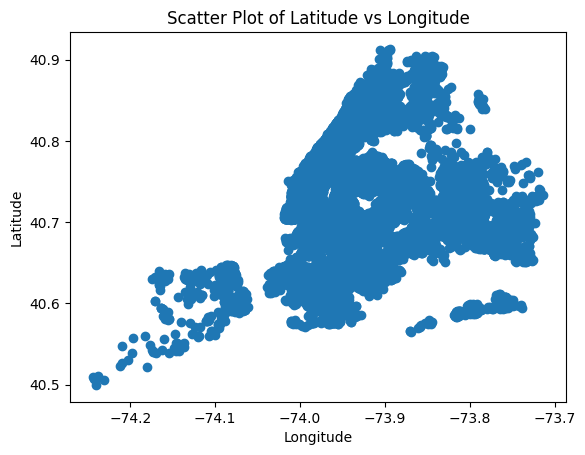

In [ ]:
#scatter-plot
plt.scatter(df['longitude'], df['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude vs Longitude')

plt.show()

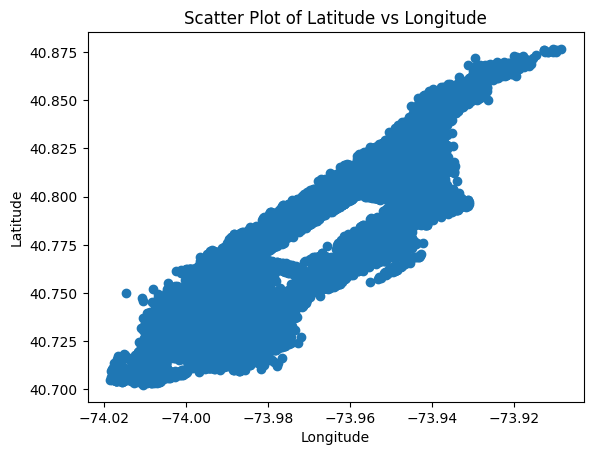

In [ ]:
#scatterplot for manhattan
df_man = df.loc[df['neighbourhood_group']== 'Manhattan']
df_man

plt.scatter(df_man['longitude'], df_man['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude vs Longitude')

plt.show()

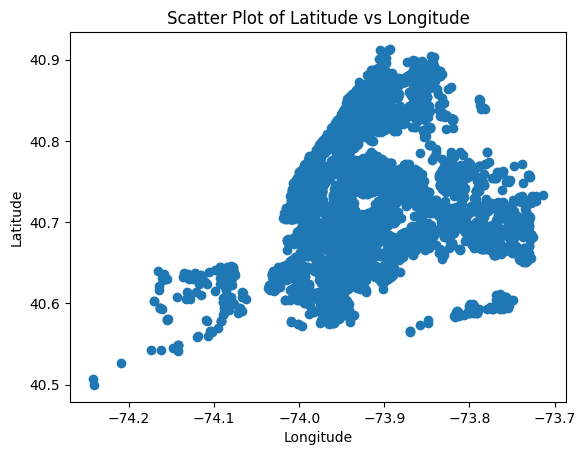

In [ ]:
#scatter plot for Private room
df_pr = df.loc[df['room_type']== 'Private room']
df_pr

plt.scatter(df_pr['longitude'], df_pr['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude vs Longitude')

plt.show()


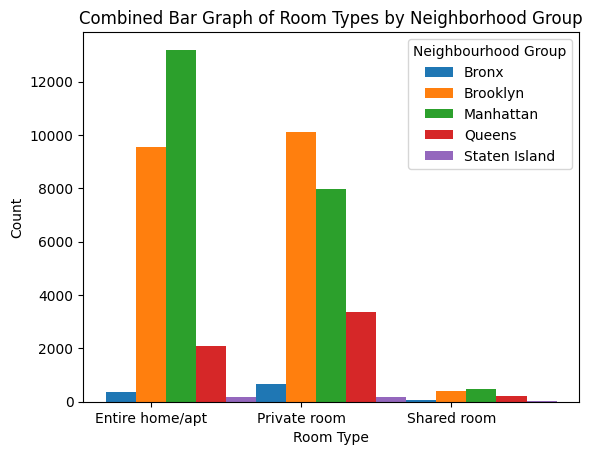

In [ ]:
# Group the data by 'room_type' and 'neighbourhood_group' and count the occurrences
grouped_data = df.groupby(['room_type', 'neighbourhood_group']).size().unstack()

# Extract the room types
room_types = grouped_data.index

# Set the bar width
bar_width = 0.2

# Calculate the positions for the bars
bar_positions = range(len(room_types))

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the bars for each 'neighbourhood_group' within each room type
for i, neighbourhood_group in enumerate(grouped_data.columns):
    ax.bar([x + i * bar_width for x in bar_positions], grouped_data[neighbourhood_group], width=bar_width,
           label=neighbourhood_group)

# Set the x-axis labels and tick positions
ax.set_xticks([x + bar_width for x in bar_positions])
ax.set_xticklabels(room_types)

# Set the labels and title
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Combined Bar Graph of Room Types by Neighborhood Group')

# Create the legend
plt.legend(title='Neighbourhood Group')

# Display the chart
plt.show()